In [1]:
import numpy as np

class DynamicReparameterization:
    def __init__(self, beta, alpha_min=0.5, alpha_max=1.0):
        self.beta = beta
        self.alpha_min = alpha_min
        self.alpha_max = alpha_max

    def adjust_reparameterization_weight(self, current_accuracy, previous_accuracy, current_weight):
        # Calculate change in accuracy
        delta_accuracy = current_accuracy - previous_accuracy
        
        # Calculate dynamic adjustment factor
        alpha = 1 - self.beta * delta_accuracy
        
        # Clip alpha to ensure it stays within the predefined range
        alpha = np.clip(alpha, self.alpha_min, self.alpha_max)
        
        # Adjust the reparameterization weight
        new_weight = current_weight * alpha
        
        return new_weight


In [17]:
import numpy as np

# Example: Number of clients
n_clients = 3

# Randomly initialized client weight matrices (for demonstration)
np.random.seed(4)
C = [np.random.rand(3, 3) for _ in range(n_clients)]  # Replace with your actual weight matrices

# Initialize coefficients (a1, a2, ..., an) randomly
a = np.random.rand(n_clients)
a /= np.sum(a)  # Normalize to sum to 1

# Learning rate
learning_rate = 0.01

# Mock test data and labels (replace with your actual test data and labels)
X_test = np.random.rand(10, 3)  # Example test data
y_test = np.random.randint(0, 2, size=(10,))  # Example binary labels for classification

def compute_loss(G, X, y):
    """
    Compute loss (e.g., binary cross-entropy loss) for binary classification.
    """
    logits = X.dot(G)  # Simple linear model
    logits = logits[:, 0]  # Use the first column for binary classification
    predictions = 1 / (1 + np.exp(-logits))  # Sigmoid for binary classification
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

# Gradient descent loop
n_iterations = 1000
for iteration in range(n_iterations):
    # Compute global weight matrix G
    G = sum(a[i] * C[i] for i in range(n_clients))

    # Compute loss
    loss = compute_loss(G, X_test, y_test)

    # Compute gradient with respect to each ai
    gradients = np.zeros(n_clients)
    for i in range(n_clients):
        G_prime = sum(a[j] * C[j] if j != i else (a[j] + 1e-5) * C[j] for j in range(n_clients))
        loss_prime = compute_loss(G_prime, X_test, y_test)
        gradients[i] = (loss_prime - loss) / 1e-5

    # Update coefficients
    a -= learning_rate * gradients
    a = np.maximum(a, 0)  # Ensure non-negative
    a /= np.sum(a)  # Normalize to sum to 1

    # Print loss for monitoring
    if iteration % 100 == 0:
        print(f"Iteration {iteration}, Loss: {loss}, Coefficients: {a}")

print("Final coefficients:", a)


Iteration 0, Loss: 0.6824783236081043, Coefficients: [0.12755015 0.5605125  0.31193735]
Iteration 100, Loss: 0.6814615309736418, Coefficients: [0.052154   0.62579939 0.32204661]
Iteration 200, Loss: 0.680994488991993, Coefficients: [0.         0.67929111 0.32070889]
Iteration 300, Loss: 0.6812787646346667, Coefficients: [0.         0.70107046 0.29892954]
Iteration 400, Loss: 0.6816304369604855, Coefficients: [0.         0.72659012 0.27340988]
Iteration 500, Loss: 0.6820705622404146, Coefficients: [0.         0.75666989 0.24333011]
Iteration 600, Loss: 0.6826286952527365, Coefficients: [0.         0.79237098 0.20762902]
Iteration 700, Loss: 0.6833472039012456, Coefficients: [0.         0.83509066 0.16490934]
Iteration 800, Loss: 0.6842882906659729, Coefficients: [0.        0.8867045 0.1132955]
Iteration 900, Loss: 0.6855457948492185, Coefficients: [0.        0.9497864 0.0502136]
Final coefficients: [0. 1. 0.]


In [2]:
nls = [[0.9888888597488403, 0.9811111092567444, 0.9917222261428833, 0.987333357334137, 0.9885703325271606, 0.9830788373947144, 0.9902231693267822, 0.9365079402923584, 0.9729030132293701, 0.9258413910865784, 0.8959044218063354, 0.359375, 0.3055555522441864, 0.6111111044883728], [0.9888888597488403, 0.9811111092567444, 0.9917222261428833, 0.987333357334137, 0.9885703325271606, 0.9830788373947144, 0.9902231693267822, 0.9365079402923584, 0.9729030132293701, 0.9258413910865784, 0.8959044218063354, 0.359375, 0.3055555522441864, 0.6111111044883728, 0.9888888597488403, 0.9817222356796265, 0.9918333292007446, 0.9872221946716309, 0.9892261624336243, 0.9811184406280518, 0.9886291027069092, 0.9399092793464661, 0.9748015403747559, 0.9304050207138062, 0.900170624256134, 0.6875, 0.4722222089767456, 0.8333333134651184], [0.9888888597488403, 0.9811111092567444, 0.9917222261428833, 0.987333357334137, 0.9885703325271606, 0.9830788373947144, 0.9902231693267822, 0.9365079402923584, 0.9729030132293701, 0.9258413910865784, 0.8959044218063354, 0.359375, 0.3055555522441864, 0.6111111044883728, 0.9888888597488403, 0.9817222356796265, 0.9918333292007446, 0.9872221946716309, 0.9892261624336243, 0.9811184406280518, 0.9886291027069092, 0.9399092793464661, 0.9748015403747559, 0.9304050207138062, 0.900170624256134, 0.6875, 0.4722222089767456, 0.8333333134651184, 0.9877222180366516, 0.9818333387374878, 0.9926111102104187, 0.9865555763244629, 0.9882892966270447, 0.983388364315033, 0.9894793033599854, 0.9452003240585327, 0.9730755686759949, 0.9281232357025146, 0.9078498482704163, 0.78125, 0.5277777910232544, 0.9444444179534912], [0.9888888597488403, 0.9811111092567444, 0.9917222261428833, 0.987333357334137, 0.9885703325271606, 0.9830788373947144, 0.9902231693267822, 0.9365079402923584, 0.9729030132293701, 0.9258413910865784, 0.8959044218063354, 0.359375, 0.3055555522441864, 0.6111111044883728, 0.9888888597488403, 0.9817222356796265, 0.9918333292007446, 0.9872221946716309, 0.9892261624336243, 0.9811184406280518, 0.9886291027069092, 0.9399092793464661, 0.9748015403747559, 0.9304050207138062, 0.900170624256134, 0.6875, 0.4722222089767456, 0.8333333134651184, 0.9877222180366516, 0.9818333387374878, 0.9926111102104187, 0.9865555763244629, 0.9882892966270447, 0.983388364315033, 0.9894793033599854, 0.9452003240585327, 0.9730755686759949, 0.9281232357025146, 0.9078498482704163, 0.78125, 0.5277777910232544, 0.9444444179534912, 0.9896666407585144, 0.9837777614593506, 0.9925000071525574, 0.9861111044883728, 0.9888514280319214, 0.9818406701087952, 0.9900106191635132, 0.9478458166122437, 0.9741111397743225, 0.9318311214447021, 0.9189419746398926, 0.78125, 0.6111111044883728, 0.9444444179534912]]

for ls in nls:
    print(ls)

[0.9888888597488403, 0.9811111092567444, 0.9917222261428833, 0.987333357334137, 0.9885703325271606, 0.9830788373947144, 0.9902231693267822, 0.9365079402923584, 0.9729030132293701, 0.9258413910865784, 0.8959044218063354, 0.359375, 0.3055555522441864, 0.6111111044883728]
[0.9888888597488403, 0.9811111092567444, 0.9917222261428833, 0.987333357334137, 0.9885703325271606, 0.9830788373947144, 0.9902231693267822, 0.9365079402923584, 0.9729030132293701, 0.9258413910865784, 0.8959044218063354, 0.359375, 0.3055555522441864, 0.6111111044883728, 0.9888888597488403, 0.9817222356796265, 0.9918333292007446, 0.9872221946716309, 0.9892261624336243, 0.9811184406280518, 0.9886291027069092, 0.9399092793464661, 0.9748015403747559, 0.9304050207138062, 0.900170624256134, 0.6875, 0.4722222089767456, 0.8333333134651184]
[0.9888888597488403, 0.9811111092567444, 0.9917222261428833, 0.987333357334137, 0.9885703325271606, 0.9830788373947144, 0.9902231693267822, 0.9365079402923584, 0.9729030132293701, 0.92584139108

In [22]:
with open("logs.txt", "a") as file:
    file.write("This is a log message.")

In [2]:
# Example usage
if __name__ == "__main__":
    # Initialize with beta = 0.5 and default alpha_min and alpha_max values
    dynamic_reparam = DynamicReparameterization(beta=0.5)
    
    # Example values
    current_accuracy = 0.85
    previous_accuracy = 0.81
    current_weight = 1.0
    
    # Adjust the reparameterization weight
    new_weight = dynamic_reparam.adjust_reparameterization_weight(current_accuracy, previous_accuracy, current_weight)
    
    print(f"Updated reparameterization weight: {new_weight}")


Updated reparameterization weight: 0.98


In [13]:
from load_data import load_cicids_2017_new
X_train_list, y_train_list, X_valid, y_valid, coefficient_weights, valid_dist = load_cicids_2017_new(is_iid=False, is_weighted = False, inverse = False)

In [15]:
from collections import Counter
for row in y_train_list:
    print(Counter(row))

Counter({2: 9000, 0: 9000})
Counter({4: 9000, 0: 9000})
Counter({3: 9000, 0: 9000})
Counter({10: 9000, 0: 9000})
Counter({0: 5337, 7: 5337})
Counter({6: 4846, 0: 4846})
Counter({5: 4705, 0: 4705})
Counter({0: 1323, 12: 1323})
Counter({0: 2897, 11: 2897})
Counter({0: 1753, 1: 1753})
Counter({0: 586, 14: 586})
Counter({0: 32, 9: 32})
Counter({0: 18, 13: 18})
Counter({8: 9, 0: 9})


In [ ]:
import os

from src.plotting import plotter1, plotter2, plotter3
cur_dir_path = "C://Users//swapn//Downloads//Federated-Learning Git//npy results"
plotter1(cur_dir_path)
plotter2(cur_dir_path)

In [5]:
from load_data import *
X_combined, X_valid, y_combined, y_valid = load_cicids_2017()
    
# Combine X_train and y_train into a single DataFrame
X_combined_df = pd.DataFrame(X_combined)
X_combined_df['Label'] = y_combined

# Separate malicious and benign samples
X_malicious = X_combined_df[X_combined_df['Label'] != 0]
X_benign = X_combined_df[X_combined_df['Label'] == 0]

valid_dist = Counter(y_valid)

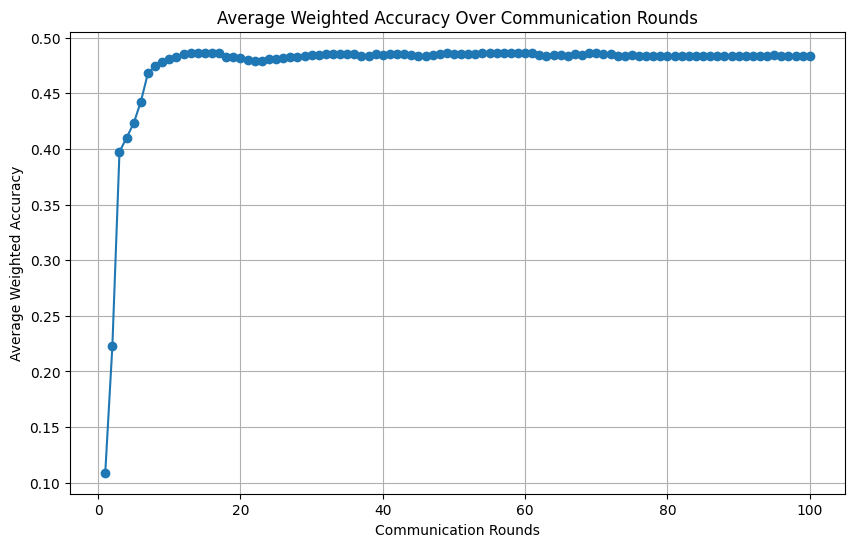

In [6]:
plotter3(cur_dir_path, valid_dist)